In [1]:
import pandas as pd
import matplotlib.pyplot as plt

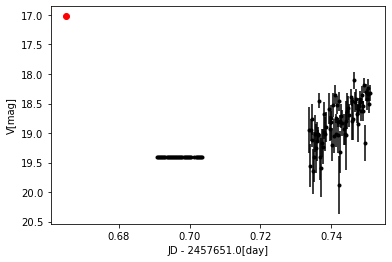

In [13]:
our_path = r"C:\Users\User\OneDrive - mail.tau.ac.il\Desktop\אוניברסיטה\אסטרו נודר\פרויקט קיץ\התחלה של קוד\astro_summer_project\starting with data\excel files\our_data.xlsx"
their_path = r"C:\Users\User\OneDrive - mail.tau.ac.il\Desktop\אוניברסיטה\אסטרו נודר\פרויקט קיץ\התחלה של קוד\astro_summer_project\starting with data\excel files\their_data.xlsx"


our_data = pd.read_excel(our_path, sheet_name='the graph data')

their_data = pd.read_excel(their_path, sheet_name='the graph data')

x = their_data.loc[:, 'JD - 2457651.0[day]']
y = their_data.loc[:, 'V[mag]']
yerr = their_data.loc[:, 'error_V[mag]']

plt.errorbar(x, y, yerr, fmt='.k', capsize=0)
plt.errorbar(our_data.loc[0, 'JD - 2457651.0[day]'], our_data.loc[0, 'V[mag]'], our_data.loc[0, 'error_V[mag]'], fmt='ro')
plt.xlabel('JD - 2457651.0[day]')
plt.ylabel('V[mag]')
plt.gca().invert_yaxis()
plt.show()


# testing luminosity

In [1]:
from astropy import units as u
from astropy import constants as const
import astropy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

distance = 26.4 * 10**6 * u.pc

R_e = {3/2: 3.07 * 10**12 * u.cm, 3: 4.57 * 10**12 * u.cm}

v_e = {3/2: 2.47 * 10**9 * u.cm / u.s, 3: 2.69 * 10**9 * u.cm / u.s}

M_e = {3/2: 3.99 * 10**-2 * u.solMass, 3: 38.34 * 10**-2 * u.solMass}


In [30]:
## we set M_c = M_sun becuase the dependence is very week
M_c = 1 * u.solMass

## M = Me + Mc
M = lambda n: M_e[n] + M_c

## vs,8.5 is the velocity of the shock vs in units of 10^8.5 cm s−1
v = lambda n: v_e[n] / (10**8.5)

## where R13 = Re/10^13 cm
R_13 = lambda n: R_e[n] / (10**13)

## where k0.34 is the opacity in units of 0.34 cm2 g−1
## where k0.34 is the opacity in units of 0.34 cm2 g−1
## k = 1 * 0.34 * u.cm**2 / u.g
k = 1

def f_p(n):
    """
    returns the ratio between the enitial mass and the core mass.
    """
    if n == 3/2:
        return (M_e[n]/M_c)**0.5
    elif n == 3:
        return 0.08 * (M_e[n]/M_c)
    


In [34]:
def L(n, t):
    """
    the final luminosity function as SW16, t in days
    """
    if n == 3/2:
        nums = [1.88, -0.086, 1.67, 0.8]
    else:
        nums = [1.66, -0.175,4.57, 0.73]
        
    A = nums[0] * 10**42
    B = (v(n) / (f_p(n) * M(n) * k)).value
    C = (v(n)**2 * (R_13(n) / k)).value
    D = (nums[2] / (19.5 * np.sqrt(k * M_e[n] * v(n)**-1))).value
    print(A, B, C, D)
    
    return A * (np.power(B * np.power(t, 2), nums[1])) * C *np.exp(-np.power(D * t, nums[3])) * u.erg / u.s



def L_p15(t):
    """
    t should be in seconds
    """
    k = 1
    R_13 = 4.00 / 10 * u.cm
    v_9 = 2.05 * u.cm / u.s
    M_e = 2.5 * 10**-2 * u.solMass
    M_sun = 1 *  u.solMass
    
    t = (t * u.d).to(u.s)
    
    
    A = 8.27 * 10**42 * k**-1 * v_9**2 * R_13
    B = -4.135 * 10**-11 * t * (t * v_9 + 2 * 10**4 * R_13)
    C = k**-1  * (M_e/(0.01*M_sun))**-1
    return A.value * np.exp(B.value * C.value)
    

1.66e+42 200.4760113813203 33.068977000000004 1.10390493393063
1.88e+42 37.60269111326617 18.729763 1.1982402078367311


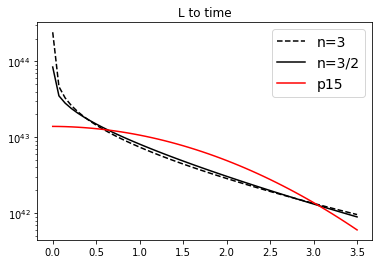

In [35]:
time = np.linspace(0.001, 3.5)
n = 3
plt.plot(time, L(n,time), '--k', label='n=3')

n = 3/2
plt.plot(time, L(n,time), 'k', label='n=3/2')

plt.plot(time, L_p15(time), '-r', label='p15')
plt.legend(fontsize=14)
plt.title("L to time")
plt.yscale('log')
plt.show()

In [33]:
4.87**0.73

3.176114435546028